<h1 align="center">DAC Author Network Analysis</h1> 

Reference:    
[1] Modularity and community structure in networks http://www.pnas.org/content/103/23/8577.full.pdf    
[2] The structure of scientific collaboration networks http://www.pnas.org/content/98/2/404.full.pdf    
[3] D. Liben-Nowell, J. Kleinberg. The Link Prediction Problem for Social Networks (2004). http://www.cs.cornell.edu/home/kleinber/link-pred.pdf

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 14})

In [2]:
import networkx as nx
from DAC import Author
from DAC import Paper
import pandas as pd
import pickle
import pyprind
import community
import operator

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

### load author and paper data

In [3]:
with open("../process_data/Author_Data.pickle", "rb") as f:
    authors = pickle.load(f)
    
with open("../process_data/Paper_Data.pickle", "rb") as f:
    papers = pickle.load(f)

In [4]:
papers['DETC2002/DAC-34072 pp. 327-336; (10 pages)'].__dict__

{'abstract': u'In curve design, controlling the characteristics of the overall shape is difficult using conventional microscopic shape-information such as dimension. Curvature entropy as calculated by the distribution of curvature was proposed as the macroscopic shape-information, and was confirmed to represent the complexity of a shape. In order to adjust the shape recognition of human beings, a Markov process was introduced into the definition of the macroscopic shape-information. Shape-generation method using the macroscopic shape-information was developed, and was applied to the design of an automobile side-view. Thus, the possibility of curve design-support using the macroscopic shape-information was indicated.',
 'author_ids': ['1093', '742'],
 'author_names': [u'Yoshiki Ujiie', u'Yoshiyuki Matsuoka'],
 'broad_topic': u'',
 'citations': [],
 'cited_by': [],
 'detc': u'DETC2002',
 'pid': u'DETC2002/DAC-34072 pp. 327-336; (10 pages)',
 'title': u'Macroscopic Shape-Information as a 

# Network Construction

In [5]:
def make_pairs(input_list):
    length = len(input_list)
    ret = []
    if length == 1:
        return []
    for i in range(0, length-1):
        for j in range(i+1, length):
            ret.append((input_list[i], input_list[j]))
    return ret

def papers_by_year(papers, inf, sup):
    ret = []
    for p in papers.values():
        if p.year <= sup and p.year >= inf:
            ret.append(p)
    return ret

def make_edges(papers_selected):
    edge_list = []
    for p in papers_selected:
        edge_list.extend(make_pairs(p.author_ids))
    return edge_list

def author_network(papers, inf_year, sup_year):
    papers_between = papers_by_year(papers, inf_year, sup_year)
    edge_list = make_edges(papers_between)
    
    G=nx.Graph()
    for edge in edge_list:
        G.add_edge(edge[0], edge[1])
    return G


In [6]:
def plot_time_series(data, ytext, xtext, filename, size, ylim = None, xlim = None):
    keys = data.keys()
    values = data.values()
    plt.figure(figsize=size)
    if ylim != None:
        plt.ylim(0, ylim)
        
    if xlim != None:
        plt.xlim(0, xlim)
        
    plt.plot(keys, values)
    for a,b in zip(keys, values): 
        plt.text(a, b, '%.2f' % b)
    plt.ylabel(ytext)
    plt.xlabel(xtext)
    
    plt.savefig('pp.png', format='png')
    plt.show()
    
    return None

def plot_time_series_2(data, ytext, xtext, filename, size, ymin, ymax):
    keys = data.keys()
    values = data.values()
    plt.figure(figsize=size)
    if ymin != None:
        plt.ylim(ymin, ymax)
        
        
    plt.plot(keys, values)
    for a,b in zip(keys, values): 
        plt.text(a, b, '%.2f' % b)
    plt.ylabel(ytext)
    plt.xlabel(xtext)
    
    plt.savefig('pp.png', format='png')
    plt.show()
    
    return None

# 1. Total papers

In [7]:
len(papers)

1668

From 2002 to 2015, there are 1668 papers in DAC.

In [8]:
def year_paper_stats():
    stats = {}
    for p in papers.values():
        stats[p.year] = 0
        
    for p in papers.values():
        stats[p.year] += 1
    
    return stats

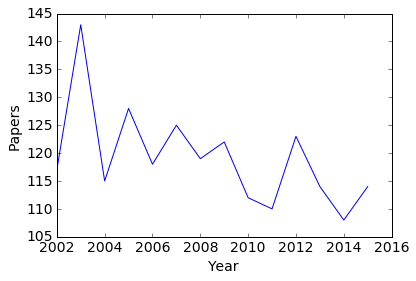

In [9]:
yt = year_paper_stats()
plt.plot(yt.keys(), yt.values())
plt.ylabel('Papers')
plt.xlabel('Year')

In [10]:
pd.DataFrame(yt.items(), columns=['Year', 'Papers'])

,Year,Papers
0,2002,117
1,2003,143
2,2004,115
3,2005,128
4,2006,118
5,2007,125
6,2008,119
7,2009,122
8,2010,112
9,2011,110


# 2. Total authors

In [11]:
len(authors)

2370

In [12]:
2370/1668.

1.420863309352518

From 2002 to 2015, there are 2370 authors in DAC.

In [13]:
def year_author_stats():
    year_au = {}
    for p in papers.values():
        year_au[p.year] = set()
        
    for p in papers.values():
        for au in p.author_ids:
            year_au[p.year].add(au)
    
    stats = {}
    for y in year_au.keys():
        stats[y] = len(year_au[y])
    return stats

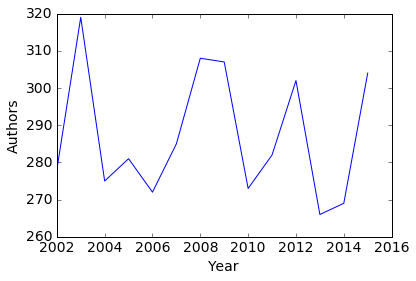

In [14]:
yt = year_author_stats()
plt.plot(yt.keys(), yt.values())
plt.ylabel('Authors')
plt.xlabel('Year')

In [15]:
pd.DataFrame(yt.items(), columns=['Year', 'Authors'])

,Year,Authors
0,2002,278
1,2003,319
2,2004,275
3,2005,281
4,2006,272
5,2007,285
6,2008,308
7,2009,307
8,2010,273
9,2011,282


# 3. Mean authors per paper

In [16]:
def avg_stats():
    stats = {}
    
    au_stats = year_author_stats()
    pp_stats = year_paper_stats()
    
    for year in au_stats.keys():
        stats[year] = float(au_stats[year])/float(pp_stats[year])
        
    return stats

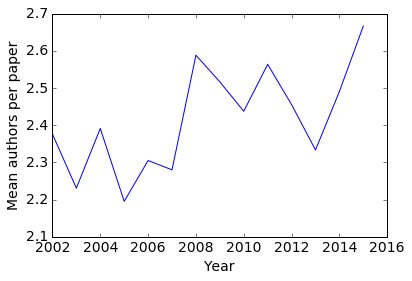

In [17]:
yt = avg_stats()
plt.plot(yt.keys(), yt.values())
plt.ylabel('Mean authors per paper')
plt.xlabel('Year')

In [18]:
yt

{2002: 2.376068376068376,
 2003: 2.230769230769231,
 2004: 2.391304347826087,
 2005: 2.1953125,
 2006: 2.305084745762712,
 2007: 2.28,
 2008: 2.588235294117647,
 2009: 2.5163934426229506,
 2010: 2.4375,
 2011: 2.5636363636363635,
 2012: 2.4552845528455283,
 2013: 2.3333333333333335,
 2014: 2.490740740740741,
 2015: 2.6666666666666665}

In [19]:
pd.DataFrame(yt.items(), columns=['Year', 'Mean authors per paper'])

,Year,Mean authors per paper
0,2002,2.376068
1,2003,2.230769
2,2004,2.391304
3,2005,2.195312
4,2006,2.305085
5,2007,2.280000
6,2008,2.588235
7,2009,2.516393
8,2010,2.437500
9,2011,2.563636


# 4. Mean distance

In [20]:
def mean_dist_year(starting_yr, ending_yr):
    g = author_network(papers, starting_yr, ending_yr)
    
    nodes = g.nodes()
    pairs = make_pairs(nodes)

    dist_list = []
    for p in pairs:
        try:
            dist_list.append(nx.shortest_path_length(g, source = str(p[0]), target = str(p[1])))
        except:
            pass

    return round(float(sum(dist_list))/len(dist_list),2)

### 4.1 Each year

In [21]:
mean_dists = {}

n = 14
bar = pyprind.ProgBar(n)

for ending in range(2002, 2016):
    bar.update()
    mean_dists[ending] = round(mean_dist_year(ending, ending), 2)

0%          100%
[##############] | ETA: 00:00:00
Total time elapsed: 00:00:04


In [22]:
mean_dists

{2002: 1.22,
 2003: 1.51,
 2004: 1.43,
 2005: 1.61,
 2006: 2.76,
 2007: 1.35,
 2008: 1.4,
 2009: 1.75,
 2010: 1.69,
 2011: 1.32,
 2012: 1.55,
 2013: 1.43,
 2014: 1.48,
 2015: 1.35}

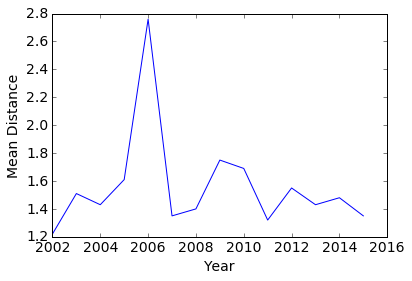

In [23]:
plt.plot(mean_dists.keys(), mean_dists.values())
plt.ylabel('Mean Distance')
plt.xlabel('Year')

### 4.2 Overall

In [24]:
mean_dist_year(2002, 2016)

5.9

# 5. Clustering coefficient C

### 5.1 Each year

In [25]:
def clustering_coefficient_year(starting_yr, ending_yr):
    g = author_network(papers, starting_yr, ending_yr)
    return nx.average_clustering(g)

In [26]:
clustering_coefficients = {}

n = 14
bar = pyprind.ProgBar(n)

for ending in range(2002, 2016):
    bar.update()
    clustering_coefficients[ending] = round(clustering_coefficient_year(ending, ending),2)

0%          100%
[##############] | ETA: 00:00:00
Total time elapsed: 00:00:00


In [27]:
clustering_coefficients

{2002: 0.63,
 2003: 0.67,
 2004: 0.67,
 2005: 0.63,
 2006: 0.71,
 2007: 0.67,
 2008: 0.75,
 2009: 0.7,
 2010: 0.76,
 2011: 0.79,
 2012: 0.74,
 2013: 0.72,
 2014: 0.75,
 2015: 0.79}

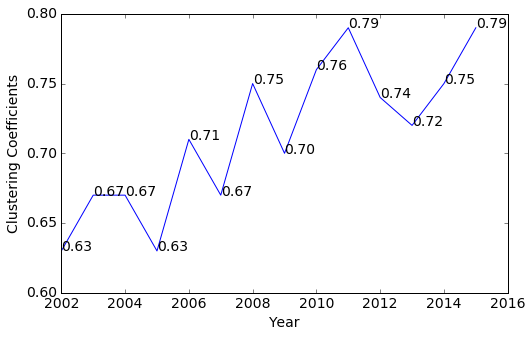

In [28]:
plot_time_series_2(clustering_coefficients, "Clustering Coefficients", "Year","avgDegYear", (8,5), 0.6, 0.8)

### 5.2 Overall

In [29]:
clustering_coefficient_year(2002, 2015)

0.7069497808608101